In [31]:
%%html
<!-- Not content, but for better presentation styles -->
<style>
.rise-enabled .rendered_html table.dataframe {
    font-size: 16px;
}
.rendered_html code {
    background: #EFEFEF;
    border: 1px solid #CCC;
    padding: 1px 5px;
    border-radius: 1px;
    font-size: 1.0em;
}
.rise-enabled .fa-times-circle:before,
.rise-enabled .fa-question:before,
.rise-enabled aside.controls {
    opacity: 0.1;
}
.rise-enabled a,
.rise-enabled a:active,
.rise-enabled a:hover,
.rise-enabled a:visited,
.rise-enabled :link {
    text-decoration: none;
    color: #A68910;
}    

.small {
    font-size: 0.8em;
}

.reference {
    height: 100%;
    margin: 8px;
    vertical-align: bottom;
    text-align: left;
    font-size: 0.75em;
}

.container {
    width: 99% !important;
}

.rendered_html {
    font-size: 0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

.rise-enabled {
    #background-color: azure !important;
    font-size: 125% !important;
    background-image: url(./images/Logo_TUD.png);#, linear-gradient(30deg, #7ab8ec, white 75%, white);
    background-size: 50px 50px;
    background-position: right 50px top 50px;
    background-repeat: no-repeat;
    background-origin: content-box;
    background-padding: 50px 0px;
}

.rise-enabled::before{
    font-size: 1.0em;
    content: "Walter de Back  -  Deep Learning for Biomedicine with Keras  -  TU Dresden";
    position: relative;
    top: 50px;
    display: block;
    text-align: center;
    color: #000000;
    #color: #45c8fc;
}


</style>

In [32]:
%matplotlib inline
import pylab as plt
import numpy as np

# Deep Learning for Biomedicine with Keras
## Concepts in deep learning



<img src="./images/segmentation.png" width="30%" align="right">


[*Walter de Back*](http://walter.deback.net)

Institute for Medical Informatics and Biometry (IMB)  
*"Carl Gustav Carus"* Faculty of Medicine  
TU Dresden

[GitLab repo](https://gitlab.com/wdeback/dl-keras-tutorial)

## Table of concepts

- Activation functions
- Loss functions
- Back propagation
- Optimization
- Regularization

- Repository:  
`gitlab.com/wdeback/dl-keras-tutorial`

- Clone repo:  
`git clone git@gitlab.com:wdeback/dl-keras-tutorial.git`

# Training neural networks

<img src="./images/neural_nets_learning.png" width="60%" align="right">


1. **Forward pass**
2. Compute loss
3. Back propagation
4. Gradient descent

<div class="reference">
Source: [Angermüller et al., Mol Sys Biol, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4965871/pdf/MSB-12-878.pdf)
</div>

### Neuron

<img src="./images/neuron.jpg" width="50%" align="right">


### Neuron

<img src="./images/neuron.jpg" width="40%" align="right">

1. Weighted sum: 
$$\hat{y} = \sum_{i=0}^{n} w_{i} \cdot x_{i} + b$$
2. Activation function:
$$y = f(\hat{y})$$

$$ y = f \left( \sum_{i=0}^{n} w_{i} \cdot x_{i} + b \right) $$

# Activation functions

- Non-linear transformation of inputs:
$$ y = f \left( \sum_{i=0}^{n} w_{i} \cdot x_{i} + b \right) $$
- Why non-linear? 
  

  - without activation function (linear or identity function), neurons would only perform linear transformation  
`y = dot(W, x) + b`
  - combination of linear functions remains linear function
  - neural network could not express more complex functions


  - piece-wise linear is nonlinear 

## Common activation functions

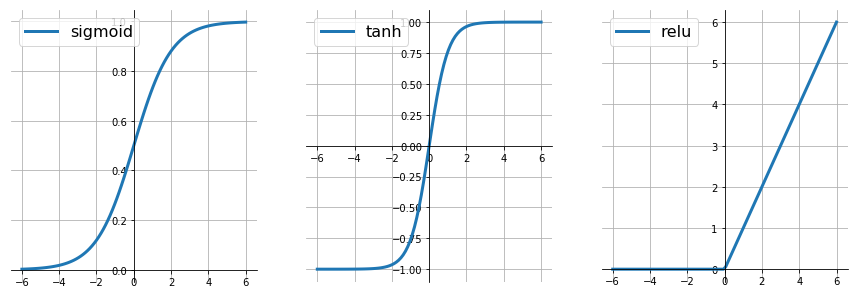

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-6,6,100); fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=False)
_ = ax[0].plot(x, sigmoid(x), lw=3, label='sigmoid')
_ = ax[1].plot(x, tanh(x),    lw=3, label='tanh')
_ = ax[2].plot(x, relu(x),    lw=3, label='relu')
def decorate(a): a.legend(fontsize=16); a.spines['left'].set_position('zero'); a.spines['right'].set_color('none'); a.spines['bottom'].set_position('zero'); a.spines['top'].set_color('none');  a.grid(True); 
for a in ax: decorate(a)

## Common activation functions: `sigmoid`

<img src="./images/sigmoid-derivative.png" width="25%" align="right"><img src="./images/sigmoid-activation-function.png" width="25%" align="right">

Takes real-valued input and “squashes” it into range between 0 and 1. Very common historically!

$f(x) = \frac{1}{(1 + e^{-x})}$

(+) biological interpretation: 0 = neuron not firing, 1 = firing at max freq  

(-) [vanishing gradient](https://cs224d.stanford.edu/notebooks/vanishing_grad_example.html): saturation prevents error back propagation  
(-) sensitive to initialization: high init values kill gradients  
(-) no zero centered: gradient all same sign during backprop  
(-) expensive: `exp()` is computationally expensive   


## Common activation functions: `tanh`

<img src="./images/tanh-derivative.png" width="22%" align="right"><img src="./images/tanh-1.png" width="25%" align="right">


Takes real-valued input and “squashes” it into range between -1 and 1.  

$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

(+) zero-centered: preferred over sigmoid  
(-) [vanishing gradient](https://cs224d.stanford.edu/notebooks/vanishing_grad_example.html)  
(-) sensitive to initialization  
(-) expensive   


## Common activation functions: `relu`

<img src="./images/relu-derivative.png" width="22%" align="right"><img src="./images/relu-activation-function-1.png" width="25%" align="right">


Rectified linear unit. Most popular currently.

$f(x) = max(0,x)$

 Piecewise linear function with 
- identity function $f(x)=x \text{ for } x>=0$
- constant $f(x)=0 \text{ for } x<0$.  

(+) easy to compute  
(+) fast convergence ([upto 6x faster](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf))  
(+) no vanishing gradient for `x>0`  
(-) vanishing gradient for `x<0`  
(-) discontinuity: gradient undefined for `x==0`  



## Other activation functions

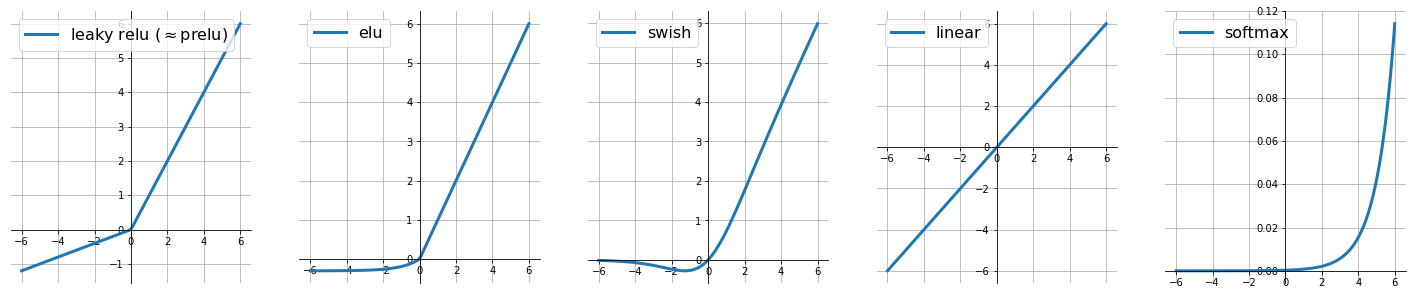

In [34]:
x = np.linspace(-6,6,100)
fig, ax = plt.subplots(1,5, figsize=(25,5),sharey=False)
    
def leaky_relu(x, alpha):
    return np.select([x < 0, x >= 0], [alpha*x, x])
def elu(x, alpha):
    return np.select([x < 0, x >= 0], [alpha * (np.exp(x) - 1.), x])
def swish(x):
    return x * sigmoid(x)
def linear(x):
    return x
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

_ = ax[0].plot(x, leaky_relu(x, alpha=0.2), lw=3, label=r'leaky relu ($\approx$prelu)')
_ = ax[1].plot(x, elu(x, alpha=0.3),   lw=3, label='elu')
_ = ax[2].plot(x, swish(x),            lw=3, label='swish')
_ = ax[3].plot(x, linear(x),           lw=3, label='linear')
_ = ax[4].plot(x, softmax(x),          lw=3, label='softmax')
for a in ax: a.legend(fontsize=16); a.spines['left'].set_position('zero'); a.spines['right'].set_color('none'); a.spines['bottom'].set_position('zero'); a.spines['top'].set_color('none');  a.grid(True); 

## Leaky ReLU and PReLU

<img src="./images/leaky-relu-activation.png" width="25%" align="right">

Leaky ReLU and parameteric ReLU

$f(x) = \begin{cases} x & \text{if } x>0 \\ \alpha x & \text{otherwise} \end{cases}$


(+) mitigate vanishing gradient issue  
(+) fast convergence ([upto 6x faster](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf))  
(-) mixed empirical results

- Difference between LeakyReLU and PReLU: 
    - LeakyReLU: $\alpha$ is fixed small value.
    - PReLU: $\alpha$ is a learned hyperparameter.

## Swish

<img src="./images/swish.jpg" width="25%" align="right">

Recently proposed [Ramachandran, 2017](https://arxiv.org/pdf/1710.05941) smooth non-monotonic activation function:

$f(x) = x \cdot \sigma(x)$  

where $\sigma(x) = \frac{1}{(1 + e^{-x})}$ (sigmoid)


(+) Similar to ReLU  
(+) Mitigates vanishing gradient  
(+) No discontinuity at $x=0$  
(-) Expensive


## Output: Softmax

Softmax or normalized exponential function is a *generalization* of the logistic function that "squashes" a **vector** of real $K$ values in the range (0, 1) that **sum up to 1**.

$f(x_j) = \frac{e^{x_j}}{\sum_{i=0}^K e^{x_i}}$

$\sum_{j=0}^K f(x_j) = 1$


- Outputs probabilities per output neuron
- Often used in output layer in classification task
- Often in combination with crossentropy loss function


## Output: Linear

<img src="./images/linear-activation-function.png" width="25%" align="right">

Linear activation function is typically the identity function:

$f(x) = x$

- Not useful as activation for hidden units
- But often used for output layer in regression tasks in combination with mean squared error loss function

# Training neural networks

<img src="./images/neural_nets_learning.png" width="60%" align="right">


1. Forward pass
2. **Compute loss**
3. Back propagation
4. Gradient descent

<div class="reference">
Source: [Angermüller et al., Mol Sys Biol, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4965871/pdf/MSB-12-878.pdf)
</div>

# Loss functions

- Loss = cost = objective function
    - Differential function that measures our unhappiness with the results


- Classification
  - Crossentropy loss
    
- Regression
  - Mean squared error

- Segmentation
  - Dice / F1 loss
    
- Embedding
  - Hinge loss
  - Cosine loss


In [35]:

def mean_squared_error(y_true, y_pred):
    return np.square(y_pred - y_true).mean()

## Crossentropy

<img src="./images/cross_entropy.png" width="25%" align="right">

Crossentropy measures distance between probability distributions, i.e. between predicted probabilities and ground-truth distribution.

Binary crossentropy (= log loss), for two classes:

$\mathcal{L}(y_t, y_p) = y_t \cdot log(y_p) + (1−y_t) \cdot log(1−y_p)$

Categorical crossentropy, for multiple classes:

$\mathcal{L}(y_t, y_p) = -\sum_{k=0}^{K} y_t^k log(y_p^k)$

where $K$ is the number of classes.

In [49]:
def binary_crossentropy(y_true, y_pred): 
    if y_true == 1:
      return -log(y_pred)
    else:
      return -log(1 - y_pred)

## Mean square error

- 

## Dice loss

<img src="./images/dice.png" width="25%" align="right">
- Dice index or [Sørensen-Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
- Used for image segmentation
- Robust to unbalanced data 

$D = \frac{2|A \cap B|}{|A| + |B|}$

where $|\ldots|$ are numbers of elements in both sets.

- Identical to [F1-score](https://en.wikipedia.org/wiki/F1_score):

$F =\frac{2P}{P+R}$ where $P = \text{precision} = \frac{TP}{TP+FP}$ and $ R = \text{recall} = \frac{TP}{TP+FN}$

- Not a proper metric; does not satisfy [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality)

More info: [Sudre et al, 2017](https://arxiv.org/pdf/1707.03237.pdf)

## Dice loss

<img src="./images/dice_unbalanced.png" width="25%" align="right">
- Dice index or [Sørensen-Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
- Used for image segmentation
- Robust to unbalanced data 

$D = \frac{2|X \cap Y|}{|X| + |Y|}$

where $|\ldots|$ are numbers of elements in both sets.

- Dice score is **insensitive to change in true negatives** (background)

## Jaccard score (IoU)

<img src="./images/iou.png" width="25%" align="right">

- Jaccard score = Interaction over Union (IoU)
- Used for object localization and segmentation

- Jaccard index = *similarity* score:  
$J = \frac{|X \cap Y|}{|X \cup Y|}$

- Jaccard index = *dissimilarity* score:  
$d_{Jaccard} = 1 - \frac{|X \cap Y|}{|X \cup Y|}$

- Metric, **does** satisfy triangle inequality

- $J$ is directly related to Dice index $D$:

$J = \frac{D}{2-D}$ and $D = \frac{2J}{1+J}$
 



In [48]:
from keras import backend as K  
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return K.mean( (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth), axis=0)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

/Users/wdeback/anaconda/envs/rise/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Metrics for image segmentation

<img src="./images/metrics_segmentation.png" width="25%" align="right">

- Many other (semi)metrics for biomedical image segmentation:
  - Adjusted Rand index
  - Mutual Information
  - Interclass correlation
  - Area under ROC curve
  - Mahalanobis distance
  - ...

- For review, see [Taka and Hanbury, BMC Med Im 2015](https://link.springer.com/article/10.1186/s12880-015-0068-x])
- Software to evaluate segmentations: [EvaluateSegmentation](https://github.com/Visceral-Project/EvaluateSegmentation)



## Hinge loss

<img src="./images/hinge.png" width="35%" align="right">

- Maximize margin of decision boundary between classes
- Penalty if score of true class is not higher, above a safety margin, than other classes

$H = max(0, y_p - y_t + m)$

or in case notation

$H = \begin{cases} 0 & \text{ if } y_t \geq y_p + m \\ y_p - y_t + m & \text{ otherwise} \end{cases}$


- Not often used for classification
- But used for learning embeddings / iage similarity
  - [Siamese networks](http://icwww.epfl.ch/~trulls/pdf/iccv-2015-deepdesc.pdf)
  - [Deep ranking](https://users.eecs.northwestern.edu/~jwa368/pdfs/deep_ranking.pdf)



# Training neural networks

<img src="./images/neural_nets_learning.png" width="60%" align="right">

1. Forward pass
2. Compute loss
3. **Back propagation**
4. Gradient descent

<div class="reference">
Source: [Angermüller et al., Mol Sys Biol, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4965871/pdf/MSB-12-878.pdf)
</div>

# Backpropagation

- Since loss is differentiable function, we can compute gradient.

- Neural network is large nested functions with known derivatives:  
`f(W1, W2, W3) = a(W1, b(W2, c(W3)))`

- We can compute contribution of each weight to loss using *chain rule*:  
`f(g(x)) = f'(g(x)) * g'(x)`

- *Backpropagation* computes contributions of all parameters to loss, starting from final layer working back to first layer.

- *Symbolic differentiation* in software like Tensorflow can compute gradient functions for known derivatives.
  - No need to implement backprop ourselves!



# Training neural networks

<img src="./images/neural_nets_learning.png" width="60%" align="right">


1. Forward pass
2. Compute loss
3. Back propagation
4. **Gradient descent**

<div class="reference">
Source: [Angermüller et al., Mol Sys Biol, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4965871/pdf/MSB-12-878.pdf)
</div>

# Optimizers

<img src="./images/optimizers.gif" width="25%" align="right">

- We know contribution of each param  
  to the loss,  
- Now we want to update the weights  
  and biases to reduce the loss. 

- Methods:
    - Stochastic gradient descent
    - Momentum
    - Nesterov
    - Adagrad
    - RMSProp
    - Adam


## Mini batch SGD

<img src="./images/sgd.png" width="25%" align="right">

1. Get batch of training `x` and labels `y`.
2. Run network on `x` to predictions `y_pred`.
3. Compute loss on the batch, i.e. mismatch  
   between `y_pred` and `y`.
4. Compute gradient of loss with regard   
   to the network’s parameters (a backward pass).
5. Move parameters a little in the opposite direction  
   from the gradient, thus reducing the loss a bit.



Section 2.4.3 of [Chollet, F., 2018. Deep learning with Python. Manning Publications.](http://www.deeplearningitalia.com/wp-content/uploads/2017/12/Dropbox_Chollet.pdf)



## Minibatch SGD

- SGD 
  - draw 1 sample
  - inaccurate but cheap
- Batch SGD
  - draw all samples
  - accurate but expensive
- Mini-batch SGD
  - draw small batch (i.e. 4 or 128)
  - efficient compromise
  - size typically limited to GPU memory


## SGD

<img src="./images/without_momentum.gif" width="25%" align="right">

Vanilla SGD:  
$$\theta = \theta_{t-1} - \eta \nabla_\theta \mathcal{L}(\theta)$$

Minibatch SGD (batchsize $n$):  
$$\theta = \theta_{t-1} - \eta \nabla_\theta \mathcal{L}(\theta; x_{i}^{i+n}; y_{i}^{i+n})$$


(+) Easy to write   
(-) Difficult to set learning rate:
  - small: slow convergence
  - large: overshoot, fluctuations

[S. Ruder, blog](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants)

## SGD with momentum

<img src="./images/with_momentum.gif" width="25%" align="right">

- [Momentum](http://linkinghub.elsevier.com/retrieve/pii/S0893608098001166) helps accelerate SGD in the  
  relevant direction and dampens oscillations. 
- Adds a fraction $\gamma$ of the update  
  vector of the past time step to the  
  current update vector.
- Typically $\gamma \approx 0.95$

SGD with momentum:  
$$v_t = \gamma v_{t-1} + \eta \nabla_\theta \mathcal{L}(\theta) \\
\theta = \theta_{t-1} - v_t$$


(+) Faster convergence  
(+) Less oscillations 

[S. Ruder, blog](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants)

## Nesterov accelerated gradient (NAG)

<img src="./images/nesterov.jpeg" width="35%" align="right">

- Anticipates next step  
  based on previous update

NAG:  
$$v_t = \gamma v_{t-1} + \eta \nabla_\theta \mathcal{L}(\theta -\gamma v_{t−1}) \\
\theta = \theta_{t-1} - v_t$$

- $\theta -\gamma v_{t−1}$ is predicted next position

(+) prevents going too fast  
(+) increases responsiveness






## Adagrad

<img src="./images/nesterov.jpeg" width="35%" align="right">

- adapts the learning rate to the parameters:
    - larger updates for infrequent
    - smaller updates for frequent parameters
- different $\eta$ for each parameter $\theta_i$

Adagrad, update per parameter:  
$$\theta_i = \theta_{i, t-1} - \frac{\eta}{\sqrt{\mathbf{G}_{ii, t-1} + \epsilon}} g_{i,t-1}$$
where 
$$g_{i,t} = \nabla_\theta \mathcal{L}(\theta_i)$$
and $\mathbf{G}$ is a diagonal matrix with sum of the squares of the gradients upto time $t$ and $\epsilon$ is small smoothing value.


(+) no need to tune learning rate  
(+) well-suited for dealing with sparse data   
(-) dimishing learning rates, as $\mathbf{G}$ grows





## Adadelta and RMSProp

- Based on Adagrad
- Resolve diminishing learning rates

- RMSProp:
  - does not use sum of gradients in $\mathbf{G}$
  - instead uses exponentially decaying average of gradients: $v_t = 0.9 \cdot g_{t-1}^2 + 0.1 \cdot g_t^2$

- Adadelta:
  - also uses exponentially decaying average of gradients
  - uses second moment of $v_t$ instead of learning rate $\eta$
  


## Adaptive Moment Estimation (Adam) 

- Adaptive learning rates per parameter
    - Exponentially decaying average of past square gradients (like RMSProp and Adadelta)
    - Exponentially decaying average of past gradients (like momentum)

Mean of gradient (first moment):
$$m_t = \beta_1 m_{t-1} + (1- \beta_1) g_t$$ 
Variance of gradient (second moment):
$$v_t = \beta_2 v_{t-1} + (1- \beta_2) g_t^2$$

Adam:  
$$\theta_i = \theta_{i, t-1} - \frac{\eta}{\sqrt{\hat v_t + \epsilon}} \hat m_{t}$$

where $\hat v$ and $\hat m$ are bias-corrected moments. [Bias-correction](https://www.coursera.org/learn/deep-neural-network/lecture/XjuhD/bias-correction-in-exponentially-weighted-averages) takes care of issue with first steps in moving averages.

- Good default parameters: $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 1e^{-8}$

(+) good default choice of optimizer  
(+) little need for parameter tuning  


## Summary optimizers

<img src="./images/optimizers.gif" width="25%" align="right">
<img src="./images/optimizers2.gif" width="25%" align="right">

- Methods
    - Stochastic gradient descent
    - Momentum
    - Nesterov
    - Adagrad
    - Adadelta / RMSProp
    - Adam

- Bottom line:
  - Use minibatches
  - Take `Adam` as default optimizer 
  - Or go old school `SGD` with momentum
  
- More info:
  - [S. Ruder's blog post](http://ruder.io/optimizing-gradient-descent)
  - [A. Karpathy @ cs231n](http://cs231n.github.io/neural-networks-3/#update)

# Regularization

<img src="./images/juhu.webp" width="25%" align="right">

- We can now optimize our model for our training data!
- But how to make sure it is also good for our test data?




## Generalization

<img src="./images/regularization.png" width="25%" align="right">
 
- Generalization:  
  *Ability to perform well on previously unobserved inputs*

- Goals of machine learning:
  - Small training error
  - Small gap between training and test error (key difference ML and optimization!)

 
- Overfitting / underfitting:  
  - Underfitting: unable to obtain small training error
  - Overfitting: large gap between training and test error.

Chapter 5 of [Goodfellow at el., Deep Learning book](http://www.deeplearningbook.org/contents/ml.html)

## Bias variance tradeoff

<img src="./images/bias-variance-tradeoff2.png" width="25%" align="right">

- Bias: an error from erroneous assumptions in the learning algorithm. 
    - High bias: danger of underfitting.
- Variance: an error from sensitivity to small fluctuations in the training set. 
   - High variance: danger of overfitting.

## Bias variance tradeoff

<img src="./images/bias-and-variance.jpg" width="25%" align="right">

- Bias: an error from erroneous assumptions in the learning algorithm. Structural problem.
   - High bias: danger of underfitting.
- Variance: an error from sensitivity to small fluctuations in the training set. 
   - High variance: danger of overfitting.
   

## Regularization

- Any technique that aims at making the model generalize better, i.e. produce better results on the test set


- Regularization methods:
  - via data:
    - data augmentation: random transformations of input data
    - [dropout](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    - batch normalization: normalize internal activations
    - train on adversarial examples
  - via model (network architecture):
    - weight sharing: param reduction (CNN)
    - activation functions: ReLU allow more expressiveness 
    - stochastic models: [Dropout](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    - [multitask learning](http://www.cs.cornell.edu/~caruana/mlj97.pdf): optimize multiple goals with shared representation 
  - via loss:
    - Dice loss: robust to class imbalance
  - via regularization term:
    - weight decay: penalty on weight value
  - via optimization:
    - weight initialization: prevent vanishing or exploding gradients (Glorot/He)
    - update methods: momentum, learning rate schedules, etc.
    - early stopping: stop before start overfitting
 
More info: ([Kukačka et al., 2017](https://arxiv.org/pdf/1710.10686.pdf))

## Dropout

<img src="./images/dropout.png" width="25%" align="right">

- Randomly drop (25%-50%) neurons from network during training.

  - Related to ensemble models: effectively training many models in parallel ([Hara et al., 2017](https://arxiv.org/abs/1706.06859)).
  - Related to Bayesian NNs: weights are Bernoulli distribution ([Gal et al. 2016](https://arxiv.org/abs/1506.02142)) 

(+) Simple and effective method of regularization.  
(+) Forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.  
(-) Dropout requires more iterations to converge.



## Batch normalization

<img src="./images/DeepNN.png" width="25%" align="right">

- Intuition: 
  - similar to input normalization, normalize hidden activations 

- Covariate shift:
  - from perspective of hidden layer, input distribution shifts all the time
  - normalize 



More info: [Andrew Ng's video @ Coursera](https://www.coursera.org/learn/deep-neural-network/lecture/81oTm/why-does-batch-norm-work) 

## Batch normalization

<img src="./images/DeepNN.png" width="25%" align="right">
<img src="./images/BN_redcats.png" width="25%" align="left">



## Batch normalization

<img src="./images/DeepNN.png" width="25%" align="right">
<img src="./images/BN_redcats.png" width="25%" align="left">
<img src="./images/BN_blackcats.png" width="25%" align="right">


## Batch normalization

**Mean** over minibatch $\mathcal{B}={x_{i...n}}$:  
$\mu_\mathcal{B} = \frac{1}{n}\sum_{i=0}{n}x_i$

**Variance**:  
$\sigma_\mathcal{B}^2 = \frac{1}{n}\sum_{i=0}{n}(x_i-\mu_\mathcal{B})^2$

**Normalization**:  
$\hat z_i = \frac{x_i-\mu_\mathcal{B}}{\sqrt{\sigma_\mathcal{B}^2 + \epsilon}}$

**Scale and shift**:  
$y_i = \gamma \hat z_i + \beta$  

where $\gamma$ and $\beta$ are **learned parameter**

(+) Reduces training time
(+) Train deeper networks
(-) Not stable for small batch sizes
(-) Different calculation between train and test phase


## Batch normalization

<img src="./images/instance_norm.png" width="25%" align="right">

Variants of batch normalization:
- [Layer normalization](https://arxiv.org/abs/1607.06450)
  - compute moments for all neurons in a layer, not per neuron
  - same during training and test phase
  - used for recurrent networks
  
- [Instance/contrast normalization](https://arxiv.org/abs/1607.08022)
  - apply normalization per data instance, not over whole batch
  - apply during training and test
  - dramatically improves style transfer



# Convolution

<img src="./images/conv_animation.gif" width="25%" align="right">

- The trick behind convolutional neural networks

- 



# Convolution
- kernel
- strides 
- dilation